In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set seaborn style to white
sns.set_style("white")

In [3]:
data = pd.read_csv('MAIN_DATASET.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.head(5)

,netflix_id,netflix_rating,number_of_votes,Title,Year,Rated,Released,Runtime,Genre,Director,...,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type
0,1,7.499086,547,Dinosaur Planet,2003–,NaN,14 Dec 2003,50 min,"Documentary, Animation, Family",NaN,...,English,USA,Won 2 Primetime Emmys. Another 4 nominations.,https://m.media-amazon.com/images/M/MV5BNTY2MD...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.7,447,tt0389605,series
1,12,6.835165,546,My Favorite Brunette,1947,Passed,04 Apr 1947,87 min,"Comedy, Crime, Mystery, Romance, Thriller",Elliott Nugent,...,English,USA,NaN,https://m.media-amazon.com/images/M/MV5BZWViOW...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.8,"3,097",tt0039645,movie
2,15,6.572414,290,Neil Diamond: Greatest Hits Live,1988,NaN,30 Jan 1991,60 min,"Documentary, Music","Dwight Hemion, Peter Israelson",...,English,USA,NaN,https://m.media-amazon.com/images/M/MV5BMjExNT...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,8.0,71,tt0168093,movie
3,17,5.806415,7108,7 Seconds,2005,R,16 Aug 2005,96 min,"Action, Comedy, Crime, Thriller",Simon Fellows,...,English,"UK, Romania, Switzerland, USA",NaN,https://m.media-amazon.com/images/M/MV5BMjQyNT...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,4.8,"6,964",tt0417395,movie
4,18,7.568737,10722,Immortal Beloved,1994,R,27 Jan 1995,121 min,"Biography, Drama, Music, Romance",Bernard Rose,...,"English, Hungarian","UK, USA",1 nomination.,https://m.media-amazon.com/images/M/MV5BOTgyZT...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.4,"23,555",tt0110116,movie


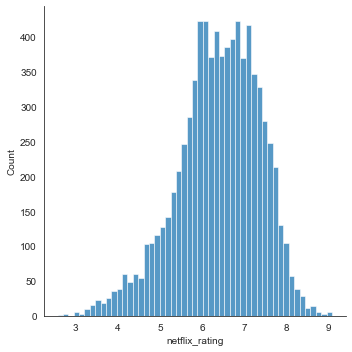

In [7]:
sns.displot(data=data, x='netflix_rating')

<AxesSubplot:>

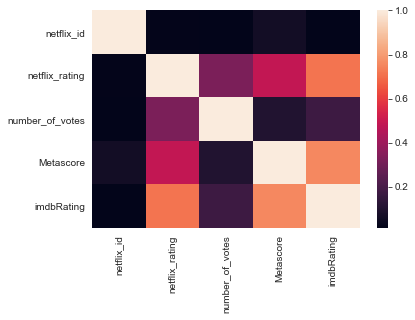

In [11]:
sns.heatmap(data.corr())

In [14]:
data.groupby('Genre').mean()

,netflix_id,netflix_rating,number_of_votes,Metascore,imdbRating
Genre,,,,,
Action,8935.26087,5.205763,513.391304,NaN,4.531818
"Action, Adventure",9814.25000,6.422320,34247.500000,57.333333,5.963636
"Action, Adventure, Biography, Drama, History, Romance, War, Western",5820.00000,6.929853,613.000000,NaN,6.800000
"Action, Adventure, Biography, Drama, Sport, Western",12732.00000,7.362206,100556.000000,54.000000,6.700000
"Action, Adventure, Comedy",7526.90000,6.200074,13179.000000,44.857143,5.790000
...,...,...,...,...,...
"Thriller, Crime, Drama",13030.00000,5.238095,105.000000,NaN,5.700000
"Thriller, Drama",5536.12500,5.739901,557.125000,45.000000,5.962500
"Thriller, Horror",3873.50000,4.366427,230.500000,NaN,4.250000


In [38]:
multiple = data[data.netflix_id == 5820]
multiple.columns

'netflix_id'

In [69]:
def unfold_by_genre(multiple):
    simple = pd.DataFrame(columns=multiple.index)
    row = multiple.copy()
    for genre in multiple['Genre'].replace(',', '').split():
        row['Genre'] = genre
        simple = simple.append(row, ignore_index=True)
    return simple


In [52]:
simple

,netflix_id,netflix_rating,number_of_votes,Title,Year,Rated,Released,Runtime,Genre,Director,...,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type
0,5820,6.929853,613,True Women,1997,PG-13,18 May 1997,183 min,Action,Karen Arthur,...,English,USA,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BM2FlNj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.8,"2,099",tt0118499,series
1,5820,6.929853,613,True Women,1997,PG-13,18 May 1997,183 min,Adventure,Karen Arthur,...,English,USA,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BM2FlNj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.8,"2,099",tt0118499,series
2,5820,6.929853,613,True Women,1997,PG-13,18 May 1997,183 min,Biography,Karen Arthur,...,English,USA,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BM2FlNj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.8,"2,099",tt0118499,series
3,5820,6.929853,613,True Women,1997,PG-13,18 May 1997,183 min,Drama,Karen Arthur,...,English,USA,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BM2FlNj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.8,"2,099",tt0118499,series
4,5820,6.929853,613,True Women,1997,PG-13,18 May 1997,183 min,History,Karen Arthur,...,English,USA,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BM2FlNj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.8,"2,099",tt0118499,series
5,5820,6.929853,613,True Women,1997,PG-13,18 May 1997,183 min,Romance,Karen Arthur,...,English,USA,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BM2FlNj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.8,"2,099",tt0118499,series
6,5820,6.929853,613,True Women,1997,PG-13,18 May 1997,183 min,War,Karen Arthur,...,English,USA,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BM2FlNj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.8,"2,099",tt0118499,series
7,5820,6.929853,613,True Women,1997,PG-13,18 May 1997,183 min,Western,Karen Arthur,...,English,USA,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BM2FlNj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.8,"2,099",tt0118499,series


In [71]:
def expand_df(data):
    df = pd.DataFrame(columns=data.columns)
    for i, row in data.iterrows():
        df = df.append(unfold_by_genre(row))
    return df

In [6]:
expanse = expand_df(data)

In [5]:
data.Genre = data.Genre.apply(lambda x: str(x))

In [77]:
expanse.shape

(21522, 23)

In [78]:
expanse.to_csv('GENRE_DATASET.csv')

In [81]:
expanse.Genre.value_counts()

Drama          4186
Comedy         2705
Romance        1971
Thriller       1841
Action         1360
Crime          1339
Adventure       979
Horror          757
Sci-Fi          714
Mystery         689
Family          673
Documentary     623
Fantasy         617
Music           485
Biography       440
War             391
Musical         371
History         342
Animation       279
Western         266
Sport           245
Short            92
Film-Noir        85
nan              39
Reality-TV       11
Adult             8
Talk-Show         6
Game-Show         4
News              4
Name: Genre, dtype: int64

<AxesSubplot:xlabel='netflix_rating', ylabel='Genre'>

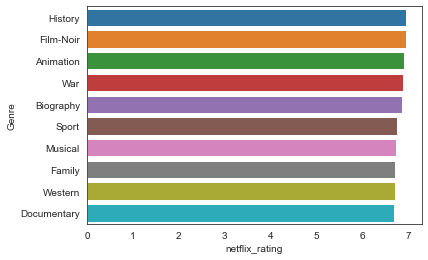

In [101]:
genres = expanse.groupby('Genre').mean().dropna().sort_values('netflix_rating', ascending=False).head(10)
sns.barplot(x=genres.netflix_rating, y=genres.index)

In [94]:
genres

,netflix_rating,Metascore,imdbRating
Genre,,,
History,6.957102,70.261905,7.212094
Film-Noir,6.951038,88.117647,7.383529
Animation,6.911561,64.344444,6.711832
War,6.888783,65.552632,6.949487
Biography,6.873028,67.340000,7.094091
Sport,6.772825,57.315436,6.601240
Musical,6.751138,63.768657,6.663243
Family,6.720519,55.536585,6.272920
Western,6.716337,60.933333,6.615849


In [ ]:
generos = ['History', 'Film-Noir', 'Animation', 'War', 'Biography', 'Sport', 'Musical', 'Family', 'Western', 'Documentary', 'Music', 'Adventure', 'Romance', 'Drama', 'Fantasy', 'Mystery', 'Crime', 'Comedy', 'Short', 'Action', 'Thriller', 'Sci-Fi', 'Horror', 'Aldult']

<AxesSubplot:xlabel='Metascore', ylabel='Genre'>

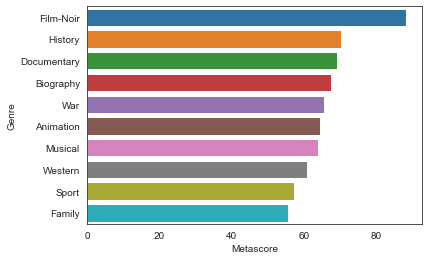

In [102]:
meta = genres.sort_values('Metascore', ascending=False).head(10)
sns.barplot(x=meta.Metascore, y=meta.index)

<AxesSubplot:xlabel='imdbRating', ylabel='Genre'>

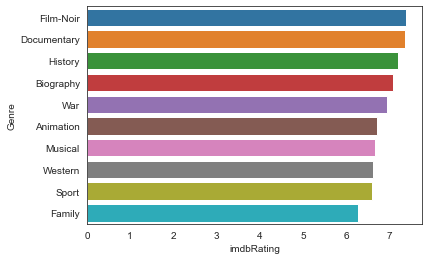

In [103]:
imdbr = genres.sort_values('imdbRating', ascending=False).head(10)
sns.barplot(x=imdbr.imdbRating, y=imdbr.index)

In [108]:
expanse[ expanse.Genre == 'History'].loc[:, ['Title', 'netflix_rating', 'Plot']]

,Title,netflix_rating,Plot
1,The Weather Underground,7.514280,In the late 1960s and early 1970s polarization...
2,Silkwood,7.458663,Fairly accurate recounting of the story of Kar...
1,Scandal,6.067624,An English bon-vivant osteopath is enchanted w...
1,The Fall of the Roman Empire,6.015504,Action-packed look at the beginnings of the fa...
2,Cast a Giant Shadow,6.877102,An American Army officer is recruited by Jews ...
...,...,...,...
2,The Times of Harvey Milk,8.051527,2 Members of the San Francisco Board of Superv...
2,Common Threads: Stories from the Quilt,7.658252,This film recounts the lives and deaths of var...
1,Gettysburg,7.740019,The four and 1/4 hour depiction of the histori...
2,Catherine the Great,5.614518,"In this romanticized biography, a small German..."


In [8]:
hist = expanse[expanse.Genre == 'History']
history_plots = [row['Plot'] for i, row in hist.iterrows()]

In [110]:
history_plots[0]

"In the late 1960s and early 1970s polarization of American political situation was becoming acute, with the Vietnam War abroad and civil rights at home being the most pressing issues. For the youth political movement, seemingly ineffectual methods of peaceful protest and resistance led to the rise of a faction that wanted a more extreme approach that the government could not ignore. One particular group, the Weather Underground, attempted to team up with the Black Panthers to violently confront the US government. They began with participation in street riots, and escalated their efforts to include the bombing of specific targets associated with the government or local power structures. Through archival footage and interviews of participants on both sides of this conflict, this film covers the Weather Underground's campaign of violence through this period, the FBI's strategies and tactics to apprehend them (including some deemed unethical or illegal), until changing times and disillusi

In [112]:
import nltk

nltk.download('punkt')

tokens = nltk.word_tokenize(history_plots[0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jgnsa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [116]:
tagged = nltk.pos_tag(tokens)

In [115]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jgnsa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [118]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\jgnsa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [120]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jgnsa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [123]:
entities = nltk.chunk.ne_chunk(tagged)

In [143]:
from collections import Counter

def sum_dic_values(lista):

    lista_dics = [Counter(str(lista[i]).split()) for i in range(len(lista))]
    dic = {}
    for diccionario in lista_dics:
        for k, v in diccionario.items():
            if k in dic.keys():
                dic[k] += v
            else:
                dic[k] = v

    return dic

In [144]:
d = sum_dic_values(history_plots)

In [178]:
common_words = pd.DataFrame(d.values(), index=d.keys()).sort_values(0, ascending=False)
common_words

,0
the,1968
of,1062
and,993
to,900
a,653
...,...
resolute,1
"Gallipoli,",1
I.,1
ANZACs,1


In [152]:
tokens = nltk.word_tokenize(' '.join(d.keys()))
tagged = nltk.pos_tag(tokens)

In [188]:
tags = ['NN', 'NNS', 'NNP', 'NNPS']#, 'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']
words = [t[0] for t in tagged if t[1] in tags]

In [189]:
words[:5]

['1960s', 'polarization', 'situation', 'acute', 'Vietnam']

In [202]:
common_words[common_words.index.isin(words)].head(10)

,0
story,68
life,64
film,61
war,36
family,34
War,33
men,29
love,27
King,27
years,26


In [62]:
# LISTA DE ARGUMENTOS A DATAFRAME CON LAS PALABRAS MÁS COMUNES

import numpy as np
import pandas as pd
import nltk
from collections import Counter

generos = ['History', 'Film-Noir', 'Animation', 'War', 'Biography', 'Sport', 'Musical', 'Family', 'Western', 'Documentary', 'Music', 'Adventure', 'Romance', 'Drama', 'Fantasy', 'Mystery', 'Crime', 'Comedy', 'Short', 'Action', 'Thriller', 'Sci-Fi', 'Horror', 'Adult']

def unfold_by_column_value(multiple, column='Genre'):
    simple = pd.DataFrame(columns=multiple.index)
    row = multiple.copy()
    for genre in multiple[column].replace(',', '').split():
        row[column] = genre
        simple = simple.append(row, ignore_index=True)
    return simple

def expand_df(data, column='Genre'):
    data[column] = data[column].apply(lambda x: str(x))
    df = pd.DataFrame(columns=data.columns)
    for i, row in data.iterrows():
        df = df.append(unfold_by_column_value(row))
    return df

def get_genre_list(df, lista, expand=False):
    if expand == True:
        expanse = expand_df(df)
    else:
        expanse = df
    generos_dfs = {g : expanse[expanse.Genre == g] for g in lista}
    return generos_dfs

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def get_column_values(filtered_df, column='Plot'):
    column_values = [str(row[column]).lower() for i, row in filtered_df.iterrows()]
    return column_values

def get_unique_word_list(column_values):
    word_list = []
    for item in [str(text).split() for text in column_values]:
        word_list += item
    word_list = list(set(word_list))
    
    tags = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JS']
    tagged = nltk.pos_tag(word_list)
    result = [t[0] for t in tagged if t[1] in tags and len(t[0]) > 1]

    return result

def sum_dic_values(column_values):

    lista_dics = [Counter(str(column_values[i]).split()) for i in range(len(column_values))]
    dic = {}
    for diccionario in lista_dics:
        for k, v in diccionario.items():
            if k == 'nan':
                continue
            elif k.lower() in dic.keys():
                dic[k.lower()] += v
            else:
                dic[k.lower()] = v

    return dic

def get_popular_nouns(filtered_df, column='Plot', top=10, word_type='default'):

    column_values = get_column_values(filtered_df, column)
    dic = sum_dic_values(column_values)

    common_words = pd.DataFrame(dic.values(), index=dic.keys()).sort_values(0, ascending=False)
    tokens = nltk.word_tokenize(' '.join(dic.keys()))
    tagged = nltk.pos_tag(tokens)

    tags = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JS']
    words = [t[0] for t in tagged if t[1] in tags and len(t[0]) > 1]

    return common_words[common_words.index.isin(words)].head(top)

def popular_by_genre(generos_dfs, top=10):
    pop_genre = {}
    for k, df in generos_dfs.items():
        globals()['pop_%s' % k] = get_popular_nouns(df, top=top)
        pop_genre[k] = (globals()['pop_%s' % k])
    return pop_genre

def search_word_popularity(word, df, genre=None, expand=False):

    generos = ['History', 'Film-Noir', 'Animation', 'War', 'Biography', 'Sport', 'Musical', 'Family',
    'Western', 'Documentary', 'Music', 'Adventure', 'Romance', 'Drama', 'Fantasy', 'Mystery', 'Crime',
    'Comedy', 'Short', 'Action', 'Thriller', 'Sci-Fi', 'Horror', 'Adult']

    if expand == True:
        expanse = expand_df(df)
    else:
        expanse = df

    dictionary = {'word': word, 'count': 0, 'genres':'','title_occurrence':0, '%_occurrence': 0}
    if genre in generos:
        expanse = expanse[expanse.Genre == genre]
        dictionary['genres'] = genre

    total = len(expanse)
    column_values = get_column_values(expanse)
    lista_dics = [Counter(str(column_values[i]).split()) for i in range(len(column_values))]
    
    ratings = []
    for i, d in enumerate(lista_dics):
        if word.lower() in d.keys():
            dictionary['count'] += d[word.lower()]
            dictionary['title_occurrence'] += 1
            if genre == None:
                gen_list = str(expanse.loc[i,'Genre']).replace(',', '').split()
                for gen in gen_list:
                    if gen not in dictionary['genres']:
                        dictionary['genres'] += f'{gen}, '
            ratings.append(expanse.iloc[i]['imdbRating'])
    
    ratings = np.array(ratings)
    ratings = list(ratings[~np.isnan(ratings)])
    dictionary['%_occurrence'] = dictionary['title_occurrence']*100/total
    try:
        dictionary['mean_rating'] = sum(ratings)/len(ratings)
    except ZeroDivisionError:
        dictionary['mean_rating'] = None
    
    return pd.DataFrame(dictionary, index=[0])

def list_to_popdf(lista, df, genre=None, expand=False):
    res_df = pd.DataFrame(columns=['word', 'count', 'genres', 'title_occurrence', '%_occurrence', 'mean_rating'])
    contador = 1
    for word in lista:
        res_df = res_df.append(search_word_popularity(word, df, genre=genre, expand=expand), ignore_index=True)
        print(contador, 'registros añadidos de', len(lista))
        contador += 1
    return res_df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jgnsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jgnsa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [193]:
expanse[expanse.Genre == 'Animation'].iloc[4]['imdbRating']

5.5

In [232]:
search_word_popularity('woman', expanse, genre='Romance')

,word,count,genres,title_occurrences,%_occurrence,mean_rating
0,woman,230,Romance,202,10.248605,6.372772


In [9]:
df = get_popular_nouns(hist)
df

,0
story,68
life,64
film,61
war,36
family,34
War,33
men,29
love,27
King,27
years,26


In [174]:
column_values = get_column_values(data)
lista_dics = [Counter(str(column_values[i]).split()) for i in range(len(column_values))]
lista_dics[0].keys()

dict_keys(['a', 'four-episode', 'animated', 'series', 'charting', 'the', 'adventures', 'of', 'four', 'dinosaurs', '-', 'each', 'on', 'different', 'continent', 'in', 'prehistoric', 'world:', 'lone', 'female', 'velociraptor', 'asia;', 'young', 'male', 'daspletosaurus', 'north', 'america;', 'south', 'american', 'saltasaur;', 'and', 'adult', 'pyroraptor', 'europe.', 'narrated', 'by', 'christian', 'slater', 'hosted', 'paleontologist', 'scott', 'sampson.'])

In [175]:
'American'.lower() in lista_dics[0].keys()

True

In [11]:
# globals()['df_%s' % i]
globals()['df']

,0
story,68
life,64
film,61
war,36
family,34
War,33
men,29
love,27
King,27
years,26


In [120]:
expanse = pd.read_csv('GENRE_DATASET.csv')
generos_dfs = get_genre_list(expanse, generos)
pop_genre = popular_by_genre(generos_dfs)

In [10]:
pop_genre = popular_by_genre(generos_dfs)

In [121]:
pop_genre['War']

,0
war,197
world,89
army,83
german,78
american,71
british,70
story,65
young,64
life,60
men,59


In [118]:
d = sum_dic_values(get_column_values(generos_dfs['War'], 'Plot'))
nltk.pos_tag(['german'])

[('german', 'JJ')]

In [2]:
data = pd.read_csv('MAIN_DATASET.csv')
#pop_data = get_popular_nouns(data)

In [60]:
nltk.pos_tag(['A', 'one'])

[('A', 'DT'), ('one', 'NN')]

In [65]:
len(data)

8056

In [88]:
gen_2 = pd.DataFrame(gen['Title']).sort_values('Title', ascending=False)
others = gen_2.iloc[7:].sum()[0]
gen_3 = pd.DataFrame(gen_2.iloc[:6].unstack())
gen_3.reset_index(inplace=True)
gen_3.rename(columns={0:'Total'}, inplace=True)
gen_3.drop(columns='level_0', inplace=True)
gen_4 = gen_3.append(pd.DataFrame({'Genre':'Others', 'Total':others}, index=[0]), ignore_index=True)


Text(0.5, 1.0, 'Genres')

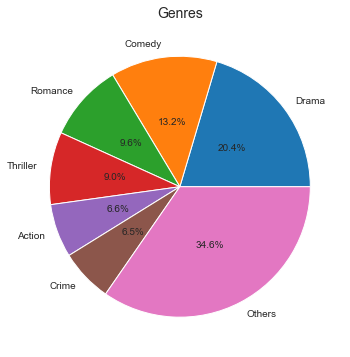

In [89]:
gen = expanse.groupby('Genre').count()

pie, ax = plt.subplots(figsize=[10,6])
labels = gen_4['Genre']
plt.pie(x=gen_4['Total'], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Genres", fontsize=14)

In [85]:
gen_4

,Genre,Total
0,Drama,4186
1,Comedy,2705
2,Romance,1971
3,Thriller,1841
4,Action,1360
5,Crime,1339
6,Adventure,979
7,Others,7102


In [98]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_genre_pie(expanse_df, top=8):

    gen = expanse.groupby('Genre').count()
    gen_2 = pd.DataFrame(gen['Title']).sort_values('Title', ascending=False)
    others = gen_2.iloc[top-1:].sum()[0]
    gen_3 = pd.DataFrame(gen_2.iloc[:top-2].unstack())
    gen_3.reset_index(inplace=True)
    gen_3.rename(columns={0:'Total'}, inplace=True)
    gen_3.drop(columns='level_0', inplace=True)
    gen_4 = gen_3.append(pd.DataFrame({'Genre':'Others', 'Total':others}, index=[0]), ignore_index=True)

    pie, ax = plt.subplots(figsize=[10,6])
    labels = gen_4['Genre']
    plt.pie(x=gen_4['Total'], autopct="%.1f%%", labels=labels, pctdistance=0.5)
    plt.title("Titles by Genre", fontsize=14)

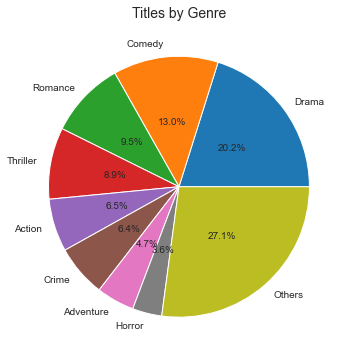

In [129]:
plot_genre_pie(expanse, top=10)

<AxesSubplot:ylabel='0'>

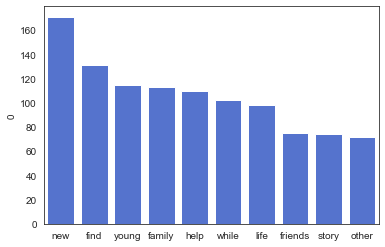

In [134]:
sns.barplot(x=pop_genre['Family'].index, y=pop_genre['Family'][0], color='royalblue')

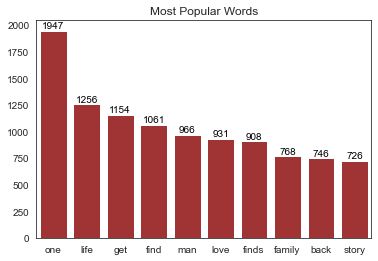

In [148]:
chart = sns.barplot(x=pop_data.index, y=pop_data[0], color='firebrick')
chart.set(ylabel=None, title='Most Popular Words')
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [205]:
arr = np.array({'d':1, 'c':2})


()

<AxesSubplot:>

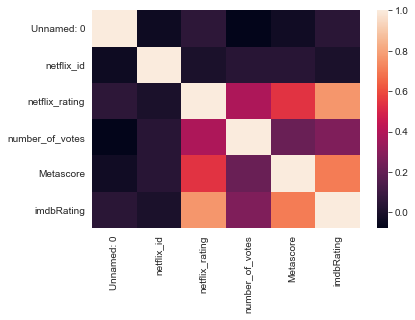

In [234]:
lista_dfs = []
generos = ['Action', 'Drama']
for g in generos:
    lista_dfs.append(expanse[expanse['Genre'] == g])

sns.heatmap(lista_dfs[0].corr())

In [61]:
%%timeit
palabras = ['journey', 'fight', 'man', 'war', 'find']
list_to_popdf(palabras, data)

3.81 s ± 39.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
search_word_popularity('man', data)

,word,count,genres,title_occurrence,%_occurrence,mean_rating
0,man,966,"Comedy, Drama, Romance, Adventure, Family, Mys...",815,10.116683,6.439704


In [26]:
import numpy as np
list(filter(lambda x: isinstance(x, float), [9.1, 7.3, np.nan]))

[9.1, 7.3, nan]

In [29]:
arr = np.array([9.1, 7.3, np.nan])
arr = arr[~np.isnan(arr)]
list(arr)

[9.1, 7.3]

In [58]:
c_values = get_column_values(data)
word_list = get_unique_word_list(c_values)

In [59]:
len(word_list)

50502

In [63]:
word_stats = list_to_popdf(word_list, data)
word_stats

1 registros añadidos de 50502
2 registros añadidos de 50502
3 registros añadidos de 50502
4 registros añadidos de 50502
5 registros añadidos de 50502
6 registros añadidos de 50502
7 registros añadidos de 50502
8 registros añadidos de 50502
9 registros añadidos de 50502
10 registros añadidos de 50502
11 registros añadidos de 50502
12 registros añadidos de 50502
13 registros añadidos de 50502
14 registros añadidos de 50502
15 registros añadidos de 50502
16 registros añadidos de 50502
17 registros añadidos de 50502
18 registros añadidos de 50502
19 registros añadidos de 50502
20 registros añadidos de 50502
21 registros añadidos de 50502
22 registros añadidos de 50502
23 registros añadidos de 50502
24 registros añadidos de 50502
25 registros añadidos de 50502
26 registros añadidos de 50502
27 registros añadidos de 50502
28 registros añadidos de 50502
29 registros añadidos de 50502
30 registros añadidos de 50502
31 registros añadidos de 50502
32 registros añadidos de 50502
33 registros añad

KeyboardInterrupt: 